<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/3_KNN_KMeans_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargamos Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Google Minería de Datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve

#Gráficador - DashBoards
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargar la base de datos

PreApr
0.0    2959
1.0    2883
dtype: int64


<ipython-input-2-a58be967cecc>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  XDB.drop(['PreApr'],1).hist()


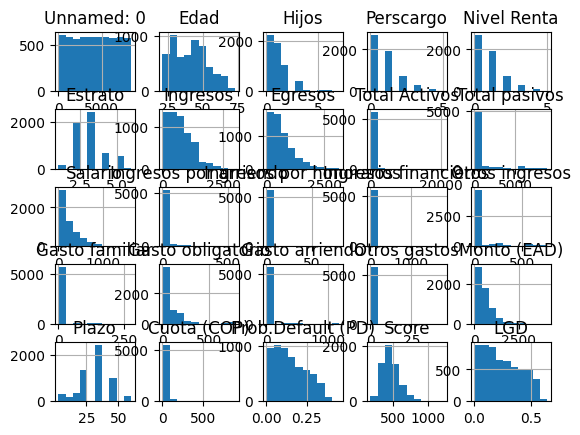

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


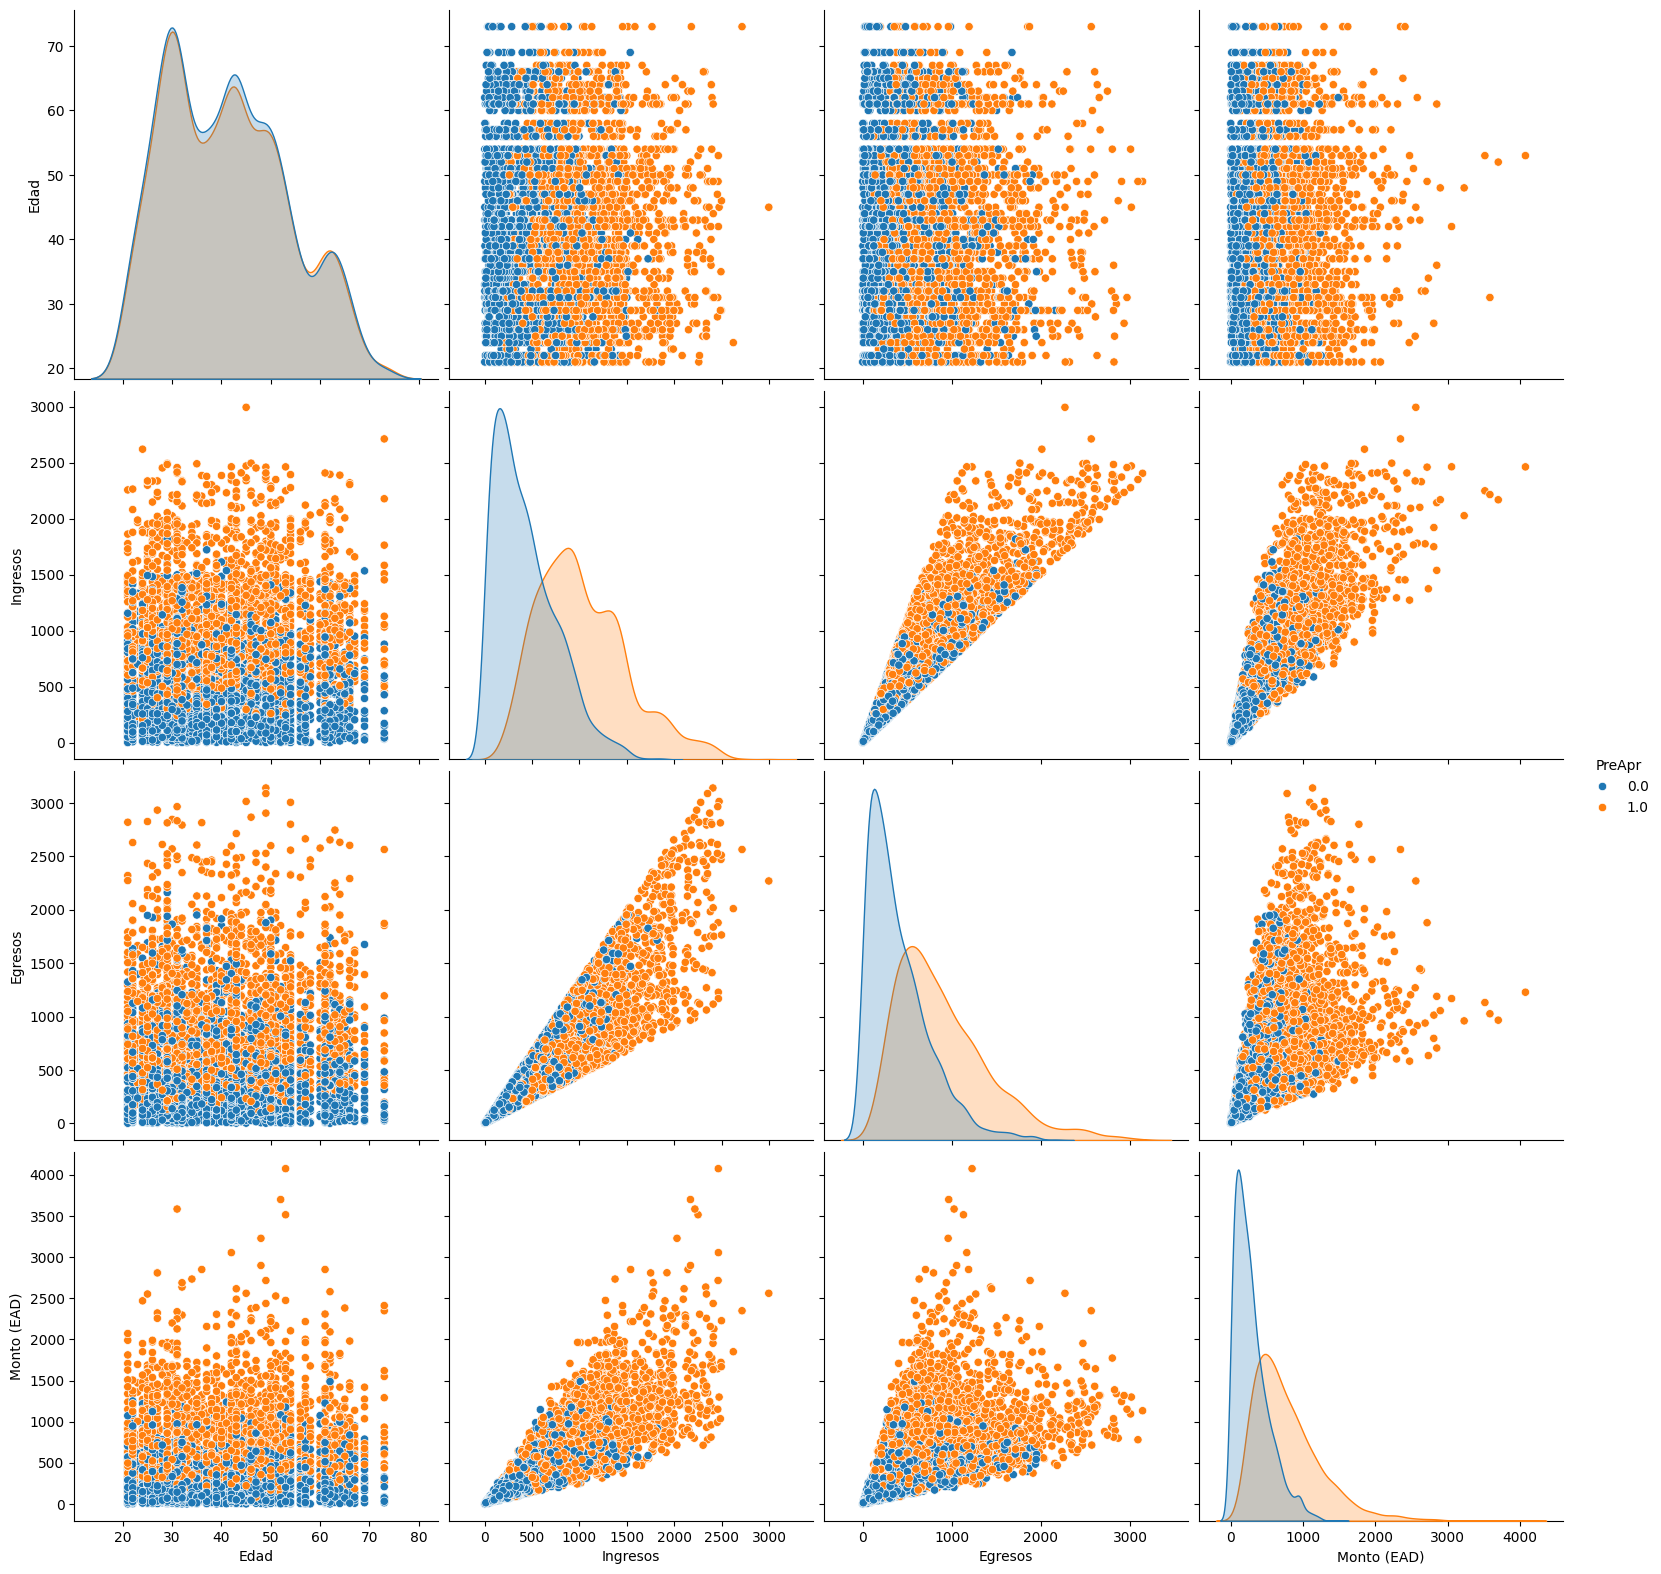

In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/0. SolicitantesCrédito(USD).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB.dropna()

#Se procede con la inspección de las variables
print(XDB.groupby('PreApr').size())
XDB.drop(['PreApr'],1).hist()
plt.show()

#Se procede a la exploración de cada una de las variables por variable deseada #Crear el DashBoard
sns.pairplot(XDB,hue='PreApr',size=4,vars=['Edad','Ingresos','Egresos','Monto (EAD)'])

#Se procede con la carga de la base de datos
XD=np.array(XDB[['Edad','Ingresos','Egresos','Monto (EAD)']])
yd=np.array(XDB[['PreApr']])

#Se procede con la correlación entre las variables
dfinf=pd.DataFrame(np.column_stack((XD[:,0],XD[:,1],XD[:,2],XD[:,3],yd)))
dfinf.columns=['Edad','Ingresos','Egresos','Monto','PreApr']
dfinf.corr()

#Se procede con la exportación de los datos
dfinf.to_excel('Informe PreAprobación.xlsx')

dfcorrel=pd.DataFrame(dfinf.corr())
dfcorrel.to_excel('InformeCorrel.xlsx')

2. Se procede con la interpretación del modelo KNN

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)
ydp=mknn.predict(XD)

cm=confusion_matrix(yd,ydp)
df=pd.DataFrame(cm)
df.to_excel('MatrizConfusión.xlsx')

#Se procede con la presentación de las métricas
VP=cm[0,0];FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]

#Se procede con la construcción de las métricas

#0. Comportamiento general del modelo (Exactitud)
print("La exactitud es: ",(VP+VN)/(VP+FN+FP+VN))
#1. Comportamiento de la Tasa de Error (En que porcentaje se descacho)
print("La Tasa de Error: ",(FP+FN)/(VP+FN+FP+VN))
#2. El coeficiente de Sensibilidad del modelo (Que efectividad tuvo el modelo solamente con los valores positivos)
print("Sensibilidad: ",VP/(VP+FN))
#3. El coeficiente de Especificidad (Como se comportó el modelo pronosticando los negativos)
print("Especificidad: ",VN/(VN+FP))
#4. La calidad de los datos para el Pronóstico Positivo es  (Si los datos de la base de dato son correctos o no)
print("Pronóstico Positvo: ",VP/(VP+FP))
#5. La calidad de los datos para el Pronóstico Negativo es
print("Pronóstico Negativo: ",VN/(FN+VN))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


La exactitud es:  0.7997261211913728
La Tasa de Error:  0.20027387880862718
Sensibilidad:  0.8235890503548496
Especificidad:  0.7752341311134235
Pronóstico Positvo:  0.7899513776337115
Pronóstico Negativo:  0.8106637649619152


In [ ]:
#Como pronosticar datos a los solicitantes que aún no lo poseen
XDB2=pd.read_excel(nxl,sheet_name=0)
XD2=np.array(XDB2[['Edad','Ingresos','Egresos','Monto (EAD)']])
yd2=np.array(XDB2[['PreApr']])
nfna=np.array(np.where(np.isnan(yd2))[0])

#Me quedo solo con los datos NA
XDN=XD2[nfna]
ydn=mknn.predict(XDN)

#Se procede con el informe
dfn=pd.DataFrame(np.column_stack((nfna,XDN,ydn)))
dfn.columns=['ID','Edad','Ingresos','Egresos','Monto','Decisión']
dfn.to_excel("InformePreApr.xlsx")

3. Evaluamos un solicitante de crédito

La decisión frente al crédito es: [0.]


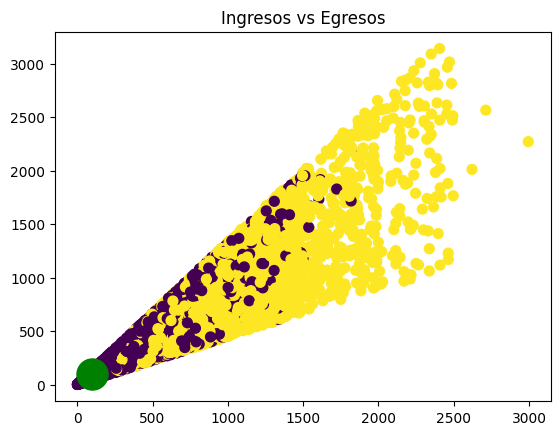

In [ ]:
XDi=np.array([(26,100,100,350)])
ydi=mknn.predict(XDi)
print("La decisión frente al crédito es:",ydi)

#Se gráfica al solicitante de crédito (Teniendo en cuenta Ingresos y Egresos)
plt.scatter(XD[:,1], XD[:,2],c=yd, s=50,cmap='viridis')
plt.scatter(XDi[:,1],XDi[:,2],marker='o',s=500,facecolors='green')
plt.title('Ingresos vs Egresos')
plt.show()

4. Creamos el modelo KMeans (Montoncitos de Datos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


El solicitante de crédito pertenece al grupo [3]


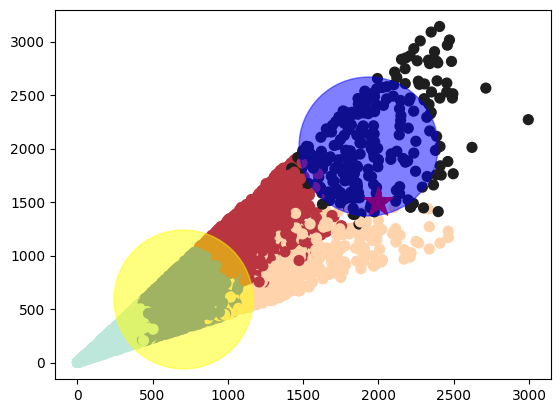

La conformación de los centroides es:
 [[  41.07228916  236.55192554  207.18873039  170.96460534]
 [  41.13045611  700.94181927  594.22875091  529.66765171]
 [  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  40.81030928 1375.63224691  823.62006048 1499.46367136]]


array([3250.36702789, 2399.62753763, 1401.23003032, 1425.76692103,
       2465.02167325])

In [ ]:
np.random.seed(42)

#Creame cinco grupos de datos - Clusters
k=5

mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)

labels=mkm.labels_
centroids=mkm.cluster_centers_

XDi=np.array([(26,2000,1500,350)])
ydk=mkm.predict(XDi)

print("El solicitante de crédito pertenece al grupo",ydk)

plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='icefire')
plt.scatter(XDi[:,1],XDi[:,2],marker='*',s=500,facecolors='red') #Grafiqueme con base a Ingresos y Egresos
plt.scatter(centroids[2,1],centroids[2,2],marker='o', alpha=0.5,s=10000,facecolors='blue') #Se analiza como cluster 2 (pq cuenta desde el 0) siendo en realidad el cluster 3
plt.scatter(centroids[1,1],centroids[1,2],marker='o',alpha=0.5,s=10000,facecolors='yellow')
plt.show()

print("La conformación de los centroides es:\n",centroids)

np.sum((np.abs(centroids-XDi)),axis=1) #Validar las Distancias

5. Se procede con la caracterización de las categorias de PreApr por centroide (cluster)

In [ ]:
counts_1=np.bincount(labels) #Cuantos datos conforman cada grupo
XDB['cluster']=labels #Que me aparezca a que cluster pertence cada solicitante de crédito

counts_2=XDB.groupby('cluster').agg({"PreApr":lambda x: (x==0).sum()})   #Agrupar cuantos 0 hay por cada categoría
counts_3=XDB.groupby('cluster').agg({"PreApr":lambda x: (x==1).sum()})   #Agrupar cuantos 1 hay por cada categoría

df=pd.DataFrame(np.column_stack((counts_2,counts_3)))


,0,1
0,1806,269
1,903,1136
2,11,261
3,226,745
4,13,472
